### Author: Tim Deville (2003506)
### Title: Hyperparameter Selection: Neural Network Size Experiment

This notebook is used to process Tensorboard training data produced during the comparison between num_layers and hidden_units values.

In [1]:
import pandas
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import tensorboard as tb

### Import the tensorboard experiment as a DataFrame

In [2]:
experiment_id = "gk3P7BBlSZy05W2ajZoiow"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars(pivot=True)

### Replace the run labels

In [3]:
df['run'] = df['run'].replace('512_2\\AdvancedNavigation', '[512,2]')
df['run'] = df['run'].replace('Baseline_512_3\\AdvancedNavigation', '[512,3]')
df['run'] = df['run'].replace('256_2\\AdvancedNavigation', '[256,2]')
df['run'] = df['run'].replace('256_3\\AdvancedNavigation', '[256,3]')
print(df["run"].unique())

['[256,2]' '[256,3]' '[512,2]' '[512,3]']


### Display Cumulative Reward Graph

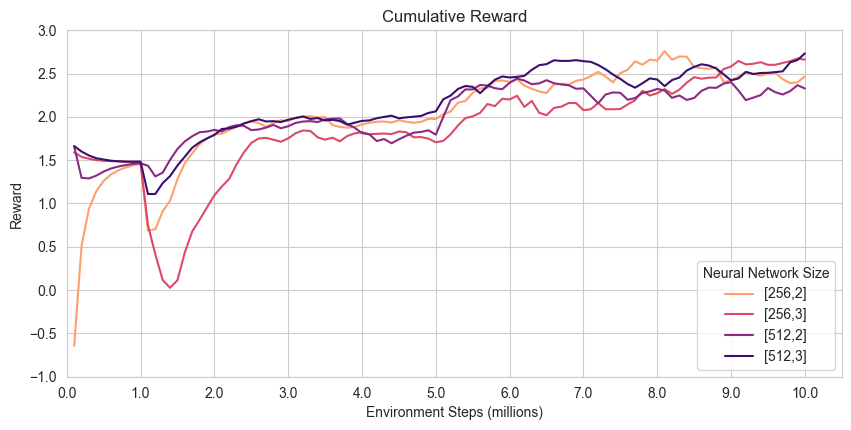

In [10]:
plt.figure(figsize=(10, 4.5))
# Smooth the values in the dataframe
rewardY = df["Environment/Cumulative Reward"].ewm(alpha=(1- 0.7)).mean()
sns.lineplot(x=df["step"], y=rewardY, hue=df["run"], palette='magma_r',
             ).set_title("Cumulative Reward")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1e6))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(n=2))

plt.xlim(xmax = 10.5e6, xmin = 0)
plt.ylim(ymax = 3, ymin = -1)
plt.xlabel("Environment Steps (millions)")
plt.ylabel("Reward")
plt.legend(title="Neural Network Size", loc="lower right")


### Load data-set csv (pre-processed in Excel)

In [5]:
exit_count_df = pd.read_csv("NN_Exit_Counts_3.csv")
exit_count_df

,Run ID,Curriculum Lesson,Exit Count
0,"[256, 2]",Lesson 1,11253.0
1,"[256, 2]",Lesson 2,4566.0
2,"[256, 2]",Lesson 3,10328.0
3,"[256, 2]",Lesson 4,3377.0
4,"[256, 2]",Lesson 5,1203.0
5,"[256, 2]",Lesson 6,1223.0
6,"[256, 3]",Lesson 1,12186.0
7,"[256, 3]",Lesson 2,854.0
8,"[256, 3]",Lesson 3,8225.0
9,"[256, 3]",Lesson 4,2844.0


### Display Total Exit Count Graph

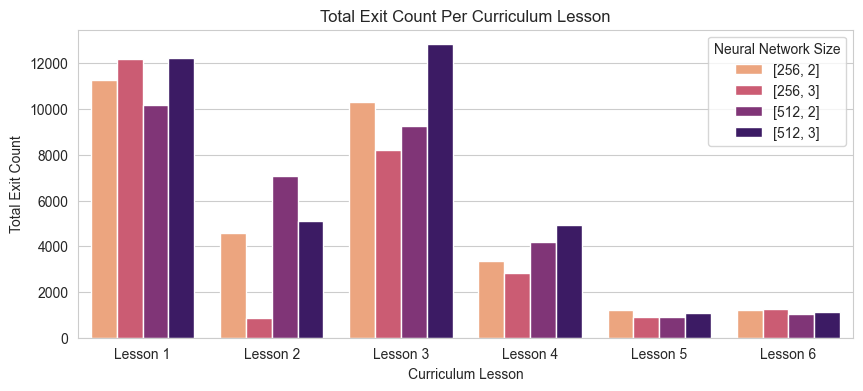

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(data=exit_count_df, x="Curriculum Lesson", y="Exit Count", hue="Run ID", palette='magma_r')
plt.title("Total Exit Count Per Curriculum Lesson")
plt.ylabel("Total Exit Count")
plt.legend(title="Neural Network Size", loc="upper right")